<a href="https://colab.research.google.com/github/nwoke008/NewRepo/blob/main/PROJECT_Diabetes_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Necessay Libraries and load the data frame**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.datasets import load_iris
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from ydata_profiling import ProfileReport

In [6]:
dpred = pd.read_csv('/content/diabetes_data_upload.csv')

In [7]:
dpred

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


**Exploring the data to checking for missing values**

**Preprocessing the data to handle missing values and encode categorical variables.**

In [8]:
dpred.isna().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [9]:
dpred.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [10]:
dpred.describe(include='O')

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [11]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1bac0983ee0746ca432331d923f059ec6ed8bf0f70a7a356edf8d5e6a70c4d16
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


**Explorative Data Analysis (EDA)**

In [14]:
profile = ProfileReport(dpred, title="Ydata_profiling_analysis",explorative =False)


In [15]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
dpred.duplicated().sum()

269

In [17]:
dpred.drop_duplicates()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


**DATA CLEANING**

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
ec=LabelEncoder()

In [20]:
dpred.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [21]:
dpred['Gender']=ec.fit_transform(dpred['Gender'])
dpred['Excessive_Urine_Prod']=ec.fit_transform(dpred['Polyuria'])
dpred['Excessive_Thirst']=ec.fit_transform(dpred['Polydipsia'])
dpred['Sudden_Weight_Loss']=ec.fit_transform(dpred['sudden weight loss'])
dpred['Weakness']=ec.fit_transform(dpred['weakness'])
dpred['Excessive_Hunger']=ec.fit_transform(dpred['Polyphagia'])
dpred['Genital_Thrush']=ec.fit_transform(dpred['Genital thrush'])
dpred['Visual_Blurring']=ec.fit_transform(dpred['visual blurring'])
dpred['Itching']=ec.fit_transform(dpred['Itching'])
dpred['Irritability']=ec.fit_transform(dpred['Irritability'])
dpred['Delayed_Healing']=ec.fit_transform(dpred['delayed healing'])
dpred['Muscle_Weakness']=ec.fit_transform(dpred['partial paresis'])
dpred['Muscle_Stiffness']=ec.fit_transform(dpred['muscle stiffness'])
dpred['Hair_Loss']=ec.fit_transform(dpred['Alopecia'])
dpred['Obesity']=ec.fit_transform(dpred['Obesity'])
dpred['Outcome']=ec.fit_transform(dpred['class'])

In [22]:
dpred.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,...,Sudden_Weight_Loss,Weakness,Excessive_Hunger,Genital_Thrush,Visual_Blurring,Delayed_Healing,Muscle_Weakness,Muscle_Stiffness,Hair_Loss,Outcome
0,40,1,No,Yes,No,Yes,No,No,No,1,...,0,1,0,0,0,1,0,1,1,1
1,58,1,No,No,No,Yes,No,No,Yes,0,...,0,1,0,0,1,0,1,0,1,1
2,41,1,Yes,No,No,Yes,Yes,No,No,1,...,0,1,1,0,0,1,0,1,1,1
3,45,1,No,No,Yes,Yes,Yes,Yes,No,1,...,1,1,1,1,0,1,0,0,0,1
4,60,1,Yes,Yes,Yes,Yes,Yes,No,Yes,1,...,1,1,1,0,1,1,1,1,1,1


In [23]:
df = dpred.drop(['Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','delayed healing','partial paresis','muscle stiffness','Alopecia','class'],axis=1)

In [24]:
df.head()

,Age,Gender,Itching,Irritability,Obesity,Excessive_Urine_Prod,Excessive_Thirst,Sudden_Weight_Loss,Weakness,Excessive_Hunger,Genital_Thrush,Visual_Blurring,Delayed_Healing,Muscle_Weakness,Muscle_Stiffness,Hair_Loss,Outcome
0,40,1,1,0,1,0,1,0,1,0,0,0,1,0,1,1,1
1,58,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1
2,41,1,1,0,0,1,0,0,1,1,0,0,1,0,1,1,1
3,45,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,1
4,60,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1


**Data Visualization Using Heat Map to determine the Correlation Matrix ,countplot , histplot to chech the relationship btw the data.**

In [25]:
cormax1 =df[['Age','Gender','Weakness','Genital_Thrush','Visual_Blurring','Itching','Irritability','Delayed_Healing','Outcome']].corr()

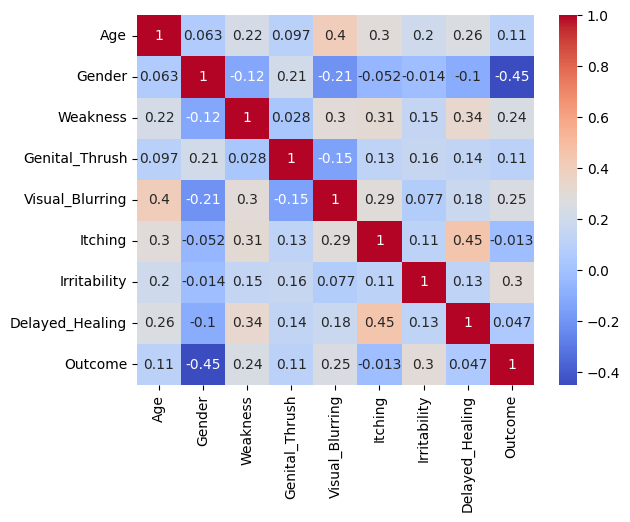

<Figure size 1500x1000 with 0 Axes>

In [26]:
sns.heatmap(cormax1,annot=True, cmap ='coolwarm')
plt.figure(figsize = (15,10))
plt.show()

In [27]:
cormax2 =df[['Obesity','Excessive_Thirst','Sudden_Weight_Loss','Excessive_Hunger','Muscle_Weakness','Muscle_Stiffness','Hair_Loss','Outcome']].corr()

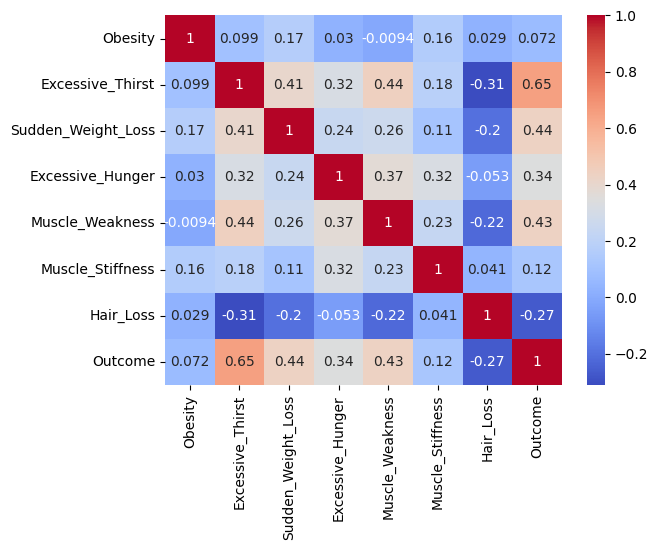

<Figure size 1500x1000 with 0 Axes>

In [28]:
sns.heatmap(cormax2,annot=True, cmap ='coolwarm')
plt.figure(figsize = (15,10))
plt.show()

**RELATIONSHIP BETWEEN AGE AND OUTCOME USING COUNTPLOT**

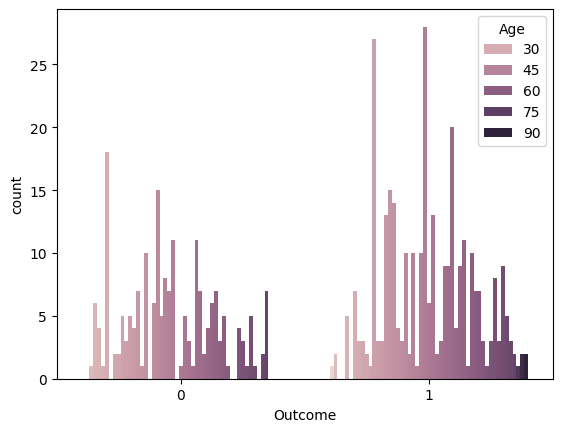

<Figure size 1500x1000 with 0 Axes>

In [29]:
sns.countplot(x='Outcome',hue='Age', data=df)
plt.figure(figsize = (15,10))
plt.show()


**RELATIONSHIP BETWEEN AGE AND OUTCOME USING HISTPLOT**

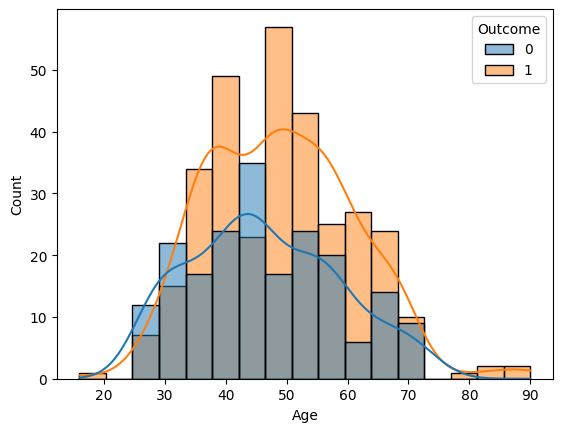

<Figure size 1500x1000 with 0 Axes>

In [30]:
sns.histplot(x='Age',hue='Outcome',kde=True,data=df)
plt.figure(figsize = (15,10))
plt.show()

**RELATIONSHIP BETWEEN GENDER AND OUTCOME USING HISTPLOT**

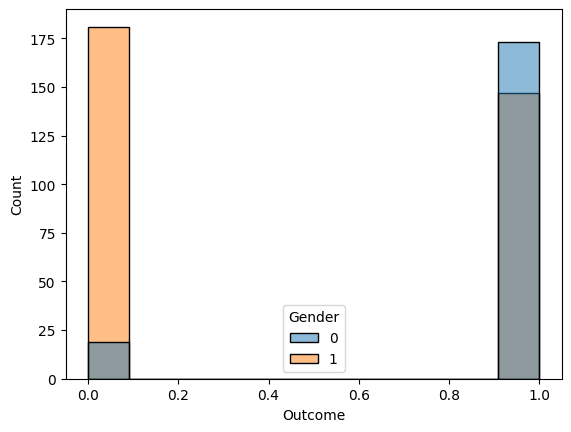

<Figure size 1500x1000 with 0 Axes>

In [31]:
sns.histplot(x='Outcome',hue='Gender', data=df)
plt.figure(figsize = (15,10))
plt.show()

**RELATIONSHIP BTW AGE AND OUTCOME TO CHECK FOR OUTLINERS USING BOXPLOT**

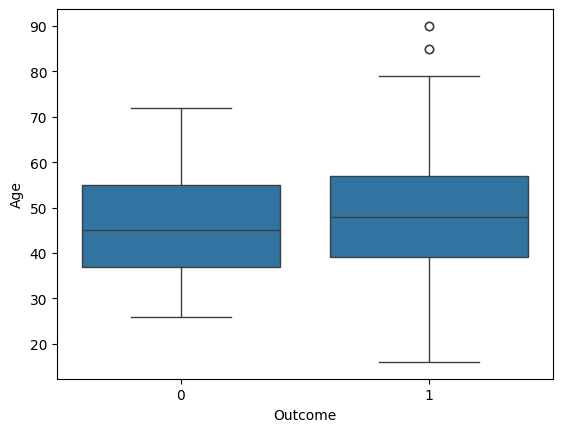

<Figure size 1500x1000 with 0 Axes>

In [32]:
sns.boxplot(x='Outcome',y='Age',data=df)
plt.figure(figsize = (15,10))
plt.show()

**RELATIONSHIP OF ALL FEATURES WITH ONE ANOTHER USING PAIRPLOT**

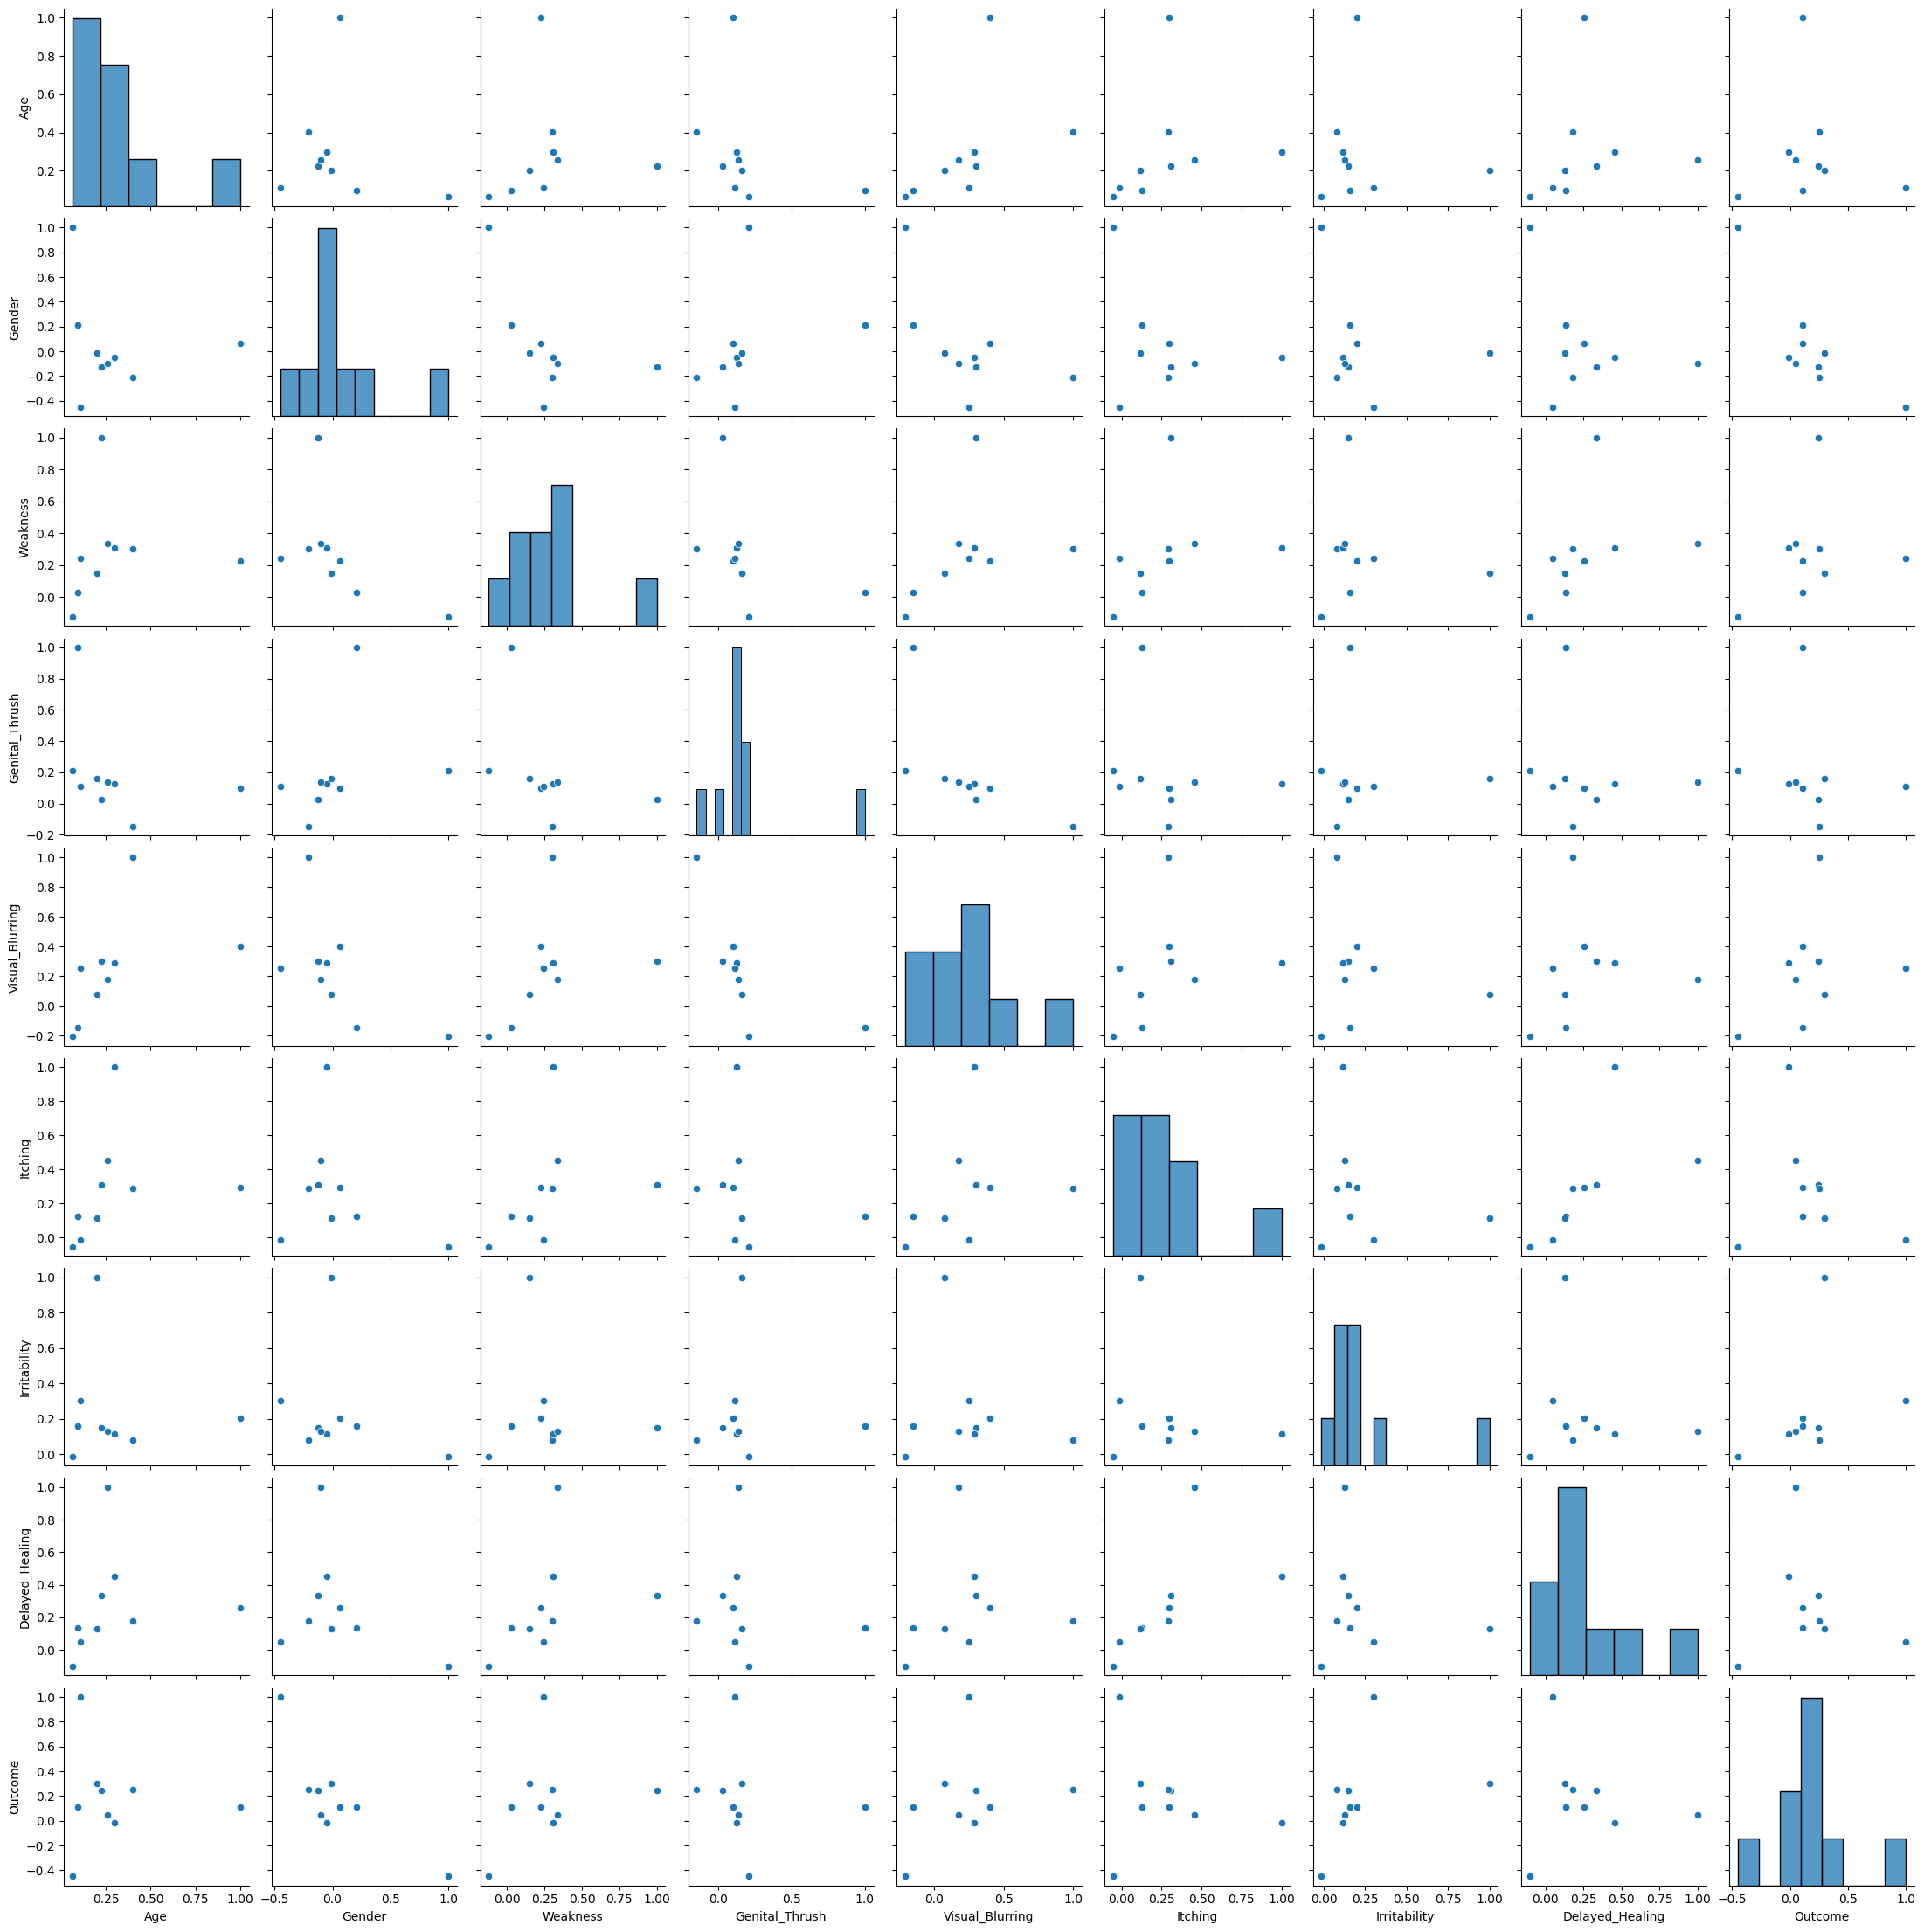

In [33]:
sns.pairplot(data=cormax1)

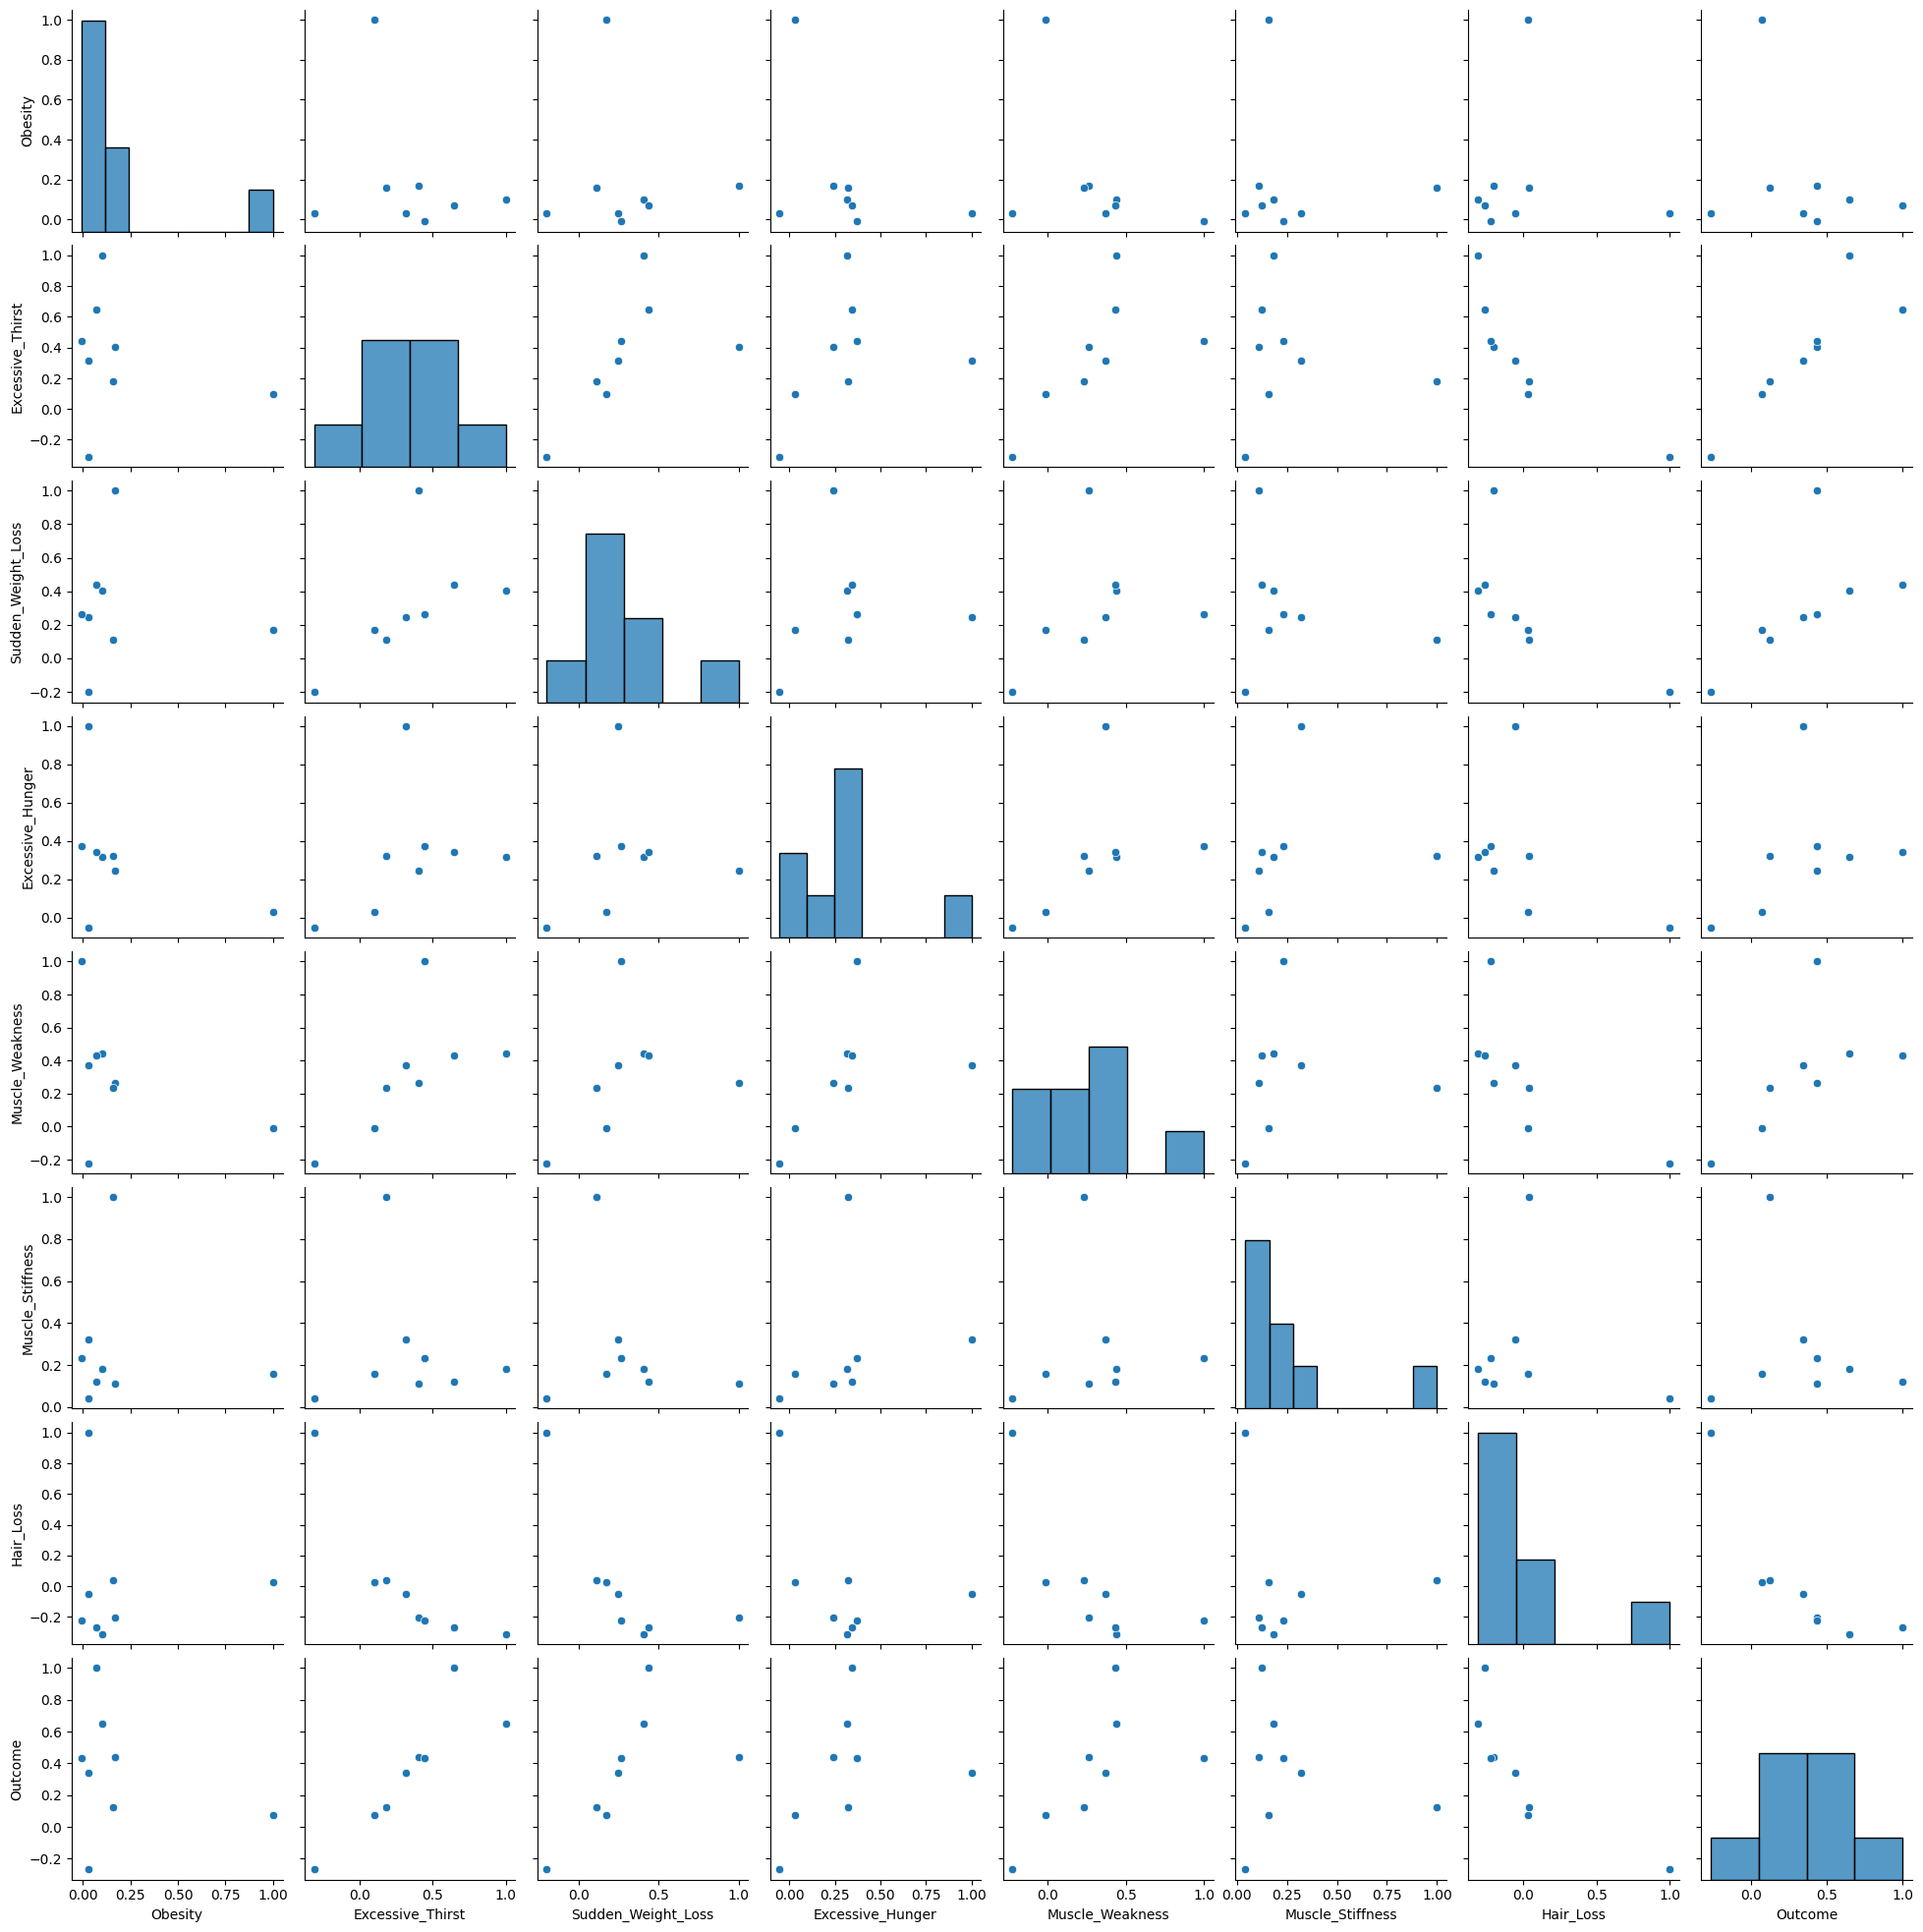

In [34]:
sns.pairplot(data=cormax2)

**DATA PREPARATION**

In [35]:
df.head()

,Age,Gender,Itching,Irritability,Obesity,Excessive_Urine_Prod,Excessive_Thirst,Sudden_Weight_Loss,Weakness,Excessive_Hunger,Genital_Thrush,Visual_Blurring,Delayed_Healing,Muscle_Weakness,Muscle_Stiffness,Hair_Loss,Outcome
0,40,1,1,0,1,0,1,0,1,0,0,0,1,0,1,1,1
1,58,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1
2,41,1,1,0,0,1,0,0,1,1,0,0,1,0,1,1,1
3,45,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,1
4,60,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1


In [36]:
X =df.iloc[:,:16]


In [37]:
X.head()

,Age,Gender,Itching,Irritability,Obesity,Excessive_Urine_Prod,Excessive_Thirst,Sudden_Weight_Loss,Weakness,Excessive_Hunger,Genital_Thrush,Visual_Blurring,Delayed_Healing,Muscle_Weakness,Muscle_Stiffness,Hair_Loss
0,40,1,1,0,1,0,1,0,1,0,0,0,1,0,1,1
1,58,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1
2,41,1,1,0,0,1,0,0,1,1,0,0,1,0,1,1
3,45,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0
4,60,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1


In [38]:
y =df.Outcome

In [39]:
y.head()

,Outcome
0,1
1,1
2,1
3,1
4,1


**SPLITTING DATA FOR TRAINING AND TESTING**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
LR = LogisticRegression()

In [43]:
LR.fit(X_train,y_train)

LogisticRegression()

In [44]:
TrainingAccuracy = LR.score(X_train,y_train)

In [45]:
TrainingAccuracy*100

92.3076923076923

In [46]:
pred = LR.predict(X_test)

In [47]:
pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

**CONFUSION MATRIX**

In [48]:
matrix = confusion_matrix(y_test, pred)

In [49]:
matrix

array([[28,  5],
       [ 3, 68]])

**RANDOM FOREST CLASSIFIER**

In [50]:
RForest = RandomForestClassifier()
RForest.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_predict = RForest.predict(X_test)


In [52]:
print(accuracy_score(y_test,y_predict))

0.9807692307692307


In [53]:
y_predict

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [54]:
RForest.predict([[40,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]])

array([0])

**USING JOBLIB TO CREATE PICKLED FILE FOR STREAMLIT DEPLOYMENT**

In [55]:
joblib.dump(X,'XScaled1.pkl')# Coverting to pickled file

['XScaled1.pkl']

In [56]:
joblib.dump(RForest, 'RForest1.pkl')

['RForest1.pkl']

**K-nearest neighbors (KNN)**

In [57]:
knn = KNeighborsClassifier(n_neighbors=2)

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [59]:
y_pred = knn.predict(X_test)

In [60]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [61]:
accuracy = accuracy_score(y_test, y_pred)

In [62]:
accuracy

0.875

**Neural Networks- keras**

In [63]:
X.shape

(520, 16)

In [64]:
model = Sequential()
model.add(Dense(10, input_dim=16, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [65]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [66]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5860 - loss: 4.4593 - val_accuracy: 0.6429 - val_loss: 3.1107
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5635 - loss: 3.7910 - val_accuracy: 0.6429 - val_loss: 2.4445
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5749 - loss: 2.9530 - val_accuracy: 0.6429 - val_loss: 1.8237
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5843 - loss: 2.1781 - val_accuracy: 0.6429 - val_loss: 1.2558
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5830 - loss: 1.4304 - val_accuracy: 0.6429 - val_loss: 0.7987
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6190 - loss: 0.8162 - val_accuracy: 0.6429 - val_loss: 0.5988
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5936 - loss: 0.6381 - val_accuracy: 0.7381 - val_loss: 0.6317
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6084 - loss: 0.6535 - val_accuracy: 0.7262 - 

In [67]:
predictions = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [68]:
predictions

array([[0.56544125, 0.43455872],
       [0.01556031, 0.9844398 ],
       [0.02742865, 0.9725714 ],
       [0.00344678, 0.9965531 ],
       [0.24410477, 0.75589526],
       [0.00592771, 0.9940723 ],
       [0.38018784, 0.61981213],
       [0.50479144, 0.49520862],
       [0.42689174, 0.5731083 ],
       [0.9386325 , 0.0613674 ],
       [0.85802805, 0.14197198],
       [0.00713441, 0.99286556],
       [0.87062126, 0.12937878],
       [0.9657487 , 0.03425137],
       [0.1330213 , 0.86697876],
       [0.21540967, 0.78459024],
       [0.7844928 , 0.21550724],
       [0.01005342, 0.9899465 ],
       [0.8695447 , 0.13045536],
       [0.01440735, 0.9855926 ],
       [0.5507639 , 0.44923607],
       [0.00506404, 0.9949359 ],
       [0.00571847, 0.99428153],
       [0.5148358 , 0.4851642 ],
       [0.3752778 , 0.62472224],
       [0.85723794, 0.14276196],
       [0.00399864, 0.9960013 ],
       [0.00185475, 0.9981452 ],
       [0.9106721 , 0.08932779],
       [0.00399864, 0.9960013 ],
       [0.

In [69]:
predictions =tf.argmax(predictions, axis=1)

In [70]:
predictions

<tf.Tensor: shape=(104,), dtype=int64, numpy=
array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0])>